# Coursework 1 - Decision Trees Learning

### Enter your candidate number here: 700041488

## Summary
In this coursework, your task is to develop a machine learning classifier for predicting female patients that at high risk of Diabetes. Your model is to support clinicians in identifying patients who are likely to have “Diabetes”. The dataset has 9 attributes in total including the “target/label” attribute. The full dataset is available on ELE under assessment coursework 1. The dataset consists of the following: 


## Dataset

1. preg: Number of times pregnant
2. plas: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. pres: Diastolic blood pressure (mm Hg)
4. skin: Triceps skin fold thickness (mm)
5. insu: 2-Hour serum insulin (mu U/ml)
6. mass: Body mass index (weight in kg/(height in m)^2)
7. pedi: Diabetes pedigree function
8. age: Age (years)
9. class: Class variable (0 or 1)

In [748]:
import pandas as pd
import os

pd.set_option('mode.chained_assignment', None)    
dia_all = pd.read_csv("diabetes.txt") # This loads the full dataset # In the file, attributes are separated by ,

In [749]:
dia_all.head(5)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


## Seperate the inpout (attributes) from target (label)

In [750]:
from sklearn.utils import shuffle
from IPython.display import HTML, display
dia_all = shuffle(dia_all)
dia_all['class'] = dia_all['class'].apply(lambda x: 1 if x == 'tested_positive' else 0)
sourcevars = dia_all.iloc[:,:-1].astype(float) #all rows + all columns except the last one
targetvar = dia_all.iloc[:,-1:] #all rows + only the last column

# Your answers
Please clearly highlight each task.

## Task1 [Exploratory data analysis]

   ### Taks 1.a [Data Processing, Statistic Analysis, Cleaning and Correlation Matrix]

$Helper \thinspace Functions$

In [751]:
def calculate_stats(df, col_name):
    '''
        Returns array of mean and mode of given column
        Arguments:
        df -- pandas dataframe
        col_name -- valid column name of dataframe
    '''
    try:
        mean = df[col_name].mean()
        mode = df[col_name].mode()
    except Exception as err:
        print('Column not found: %s'%col_name)
    mm_array = [mean,mode]
    return mm_array

$Zero \thinspace Replacement$

In [752]:
df = pd.DataFrame()
for col in sourcevars.columns:
    sourcevars[col] = sourcevars[col].mask(sourcevars[col] == 0,calculate_stats(sourcevars, col)[0])

$Data \thinspace Statistics$

In [753]:
display(HTML(dia_all.describe().to_html()))

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [956]:
def plot_corr_matrix(data_frame, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        data_frame: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        Correlation Matrix.
    """

    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

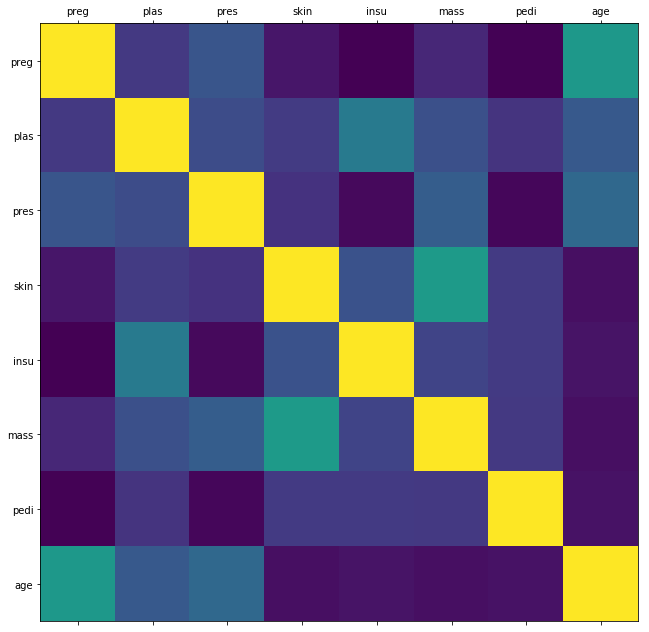

In [957]:
plot_corr_matrix(sourcevars)

In [619]:
display(HTML(sourcevars.corr().to_html()))

,preg,plas,pres,skin,insu,mass,pedi,age
preg,1.000000,0.152568,0.253275,0.045776,-0.016738,0.097663,-0.010297,0.525261
plas,0.152568,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600
pres,0.253275,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740
skin,0.045776,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423
insu,-0.016738,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652
mass,0.097663,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748
pedi,-0.010297,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561
age,0.525261,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000


   ## Task 1.b [Understand data using grouping and Class Distribution]

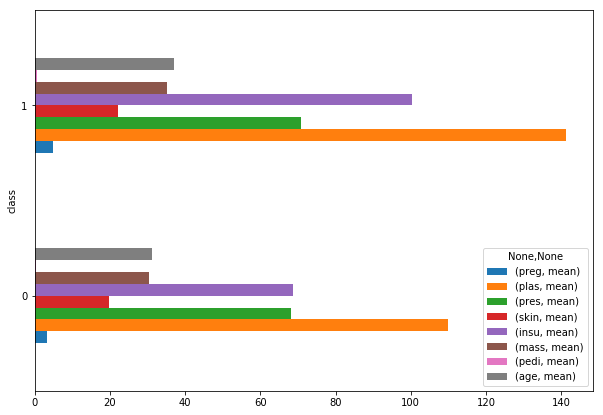

In [955]:
from matplotlib import pyplot as plt

%matplotlib inline

# columns = sourcevars.columns
# fig = plt.figure(figsize=(18, 15))
# length=len(columns)
# for j,col in enumerate(columns):
#     plt.subplot((length/2), 3, j+1)
#     plt.subplots_adjust(wspace=0.2, hspace=0.5)
#     sourcevars[col].hist(bins=12, edgecolor='red')
#     plt.title(col)
df2 = dia_all.groupby(['class']).agg(['mean'])
df2.plot(kind='barh', stacked=False, figsize=(10,7));

$Check \thinspace for \thinspace distribution \thinspace of \thinspace true \thinspace and \thinspace false \thinspace cases$

In [958]:
num_obs = len(dia_all)
num_true = len(targetvar.loc[targetvar['class'] == 1])
num_false = len(targetvar.loc[targetvar['class'] == 0])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print('_________________________________________________')
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  268 (34.90%)
_________________________________________________
Number of False cases: 500 (65.10%)


   ## Task 2.a [ Classification]

### 2.a.1 Decision Tree (DT) classifier

In [621]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [790]:
split_test_size = 0.30
X = sourcevars
y = targetvar
X_train, X_test, y_train, y_test = train_test_split(X,targetvar,test_size=split_test_size,random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Find optimum parameters using Grid Search technique

In [623]:
# Parameter evaluation
treeclf = DecisionTreeClassifier(random_state=42)
parameters = {'max_depth': [6, 7, 8, 9],
              'min_samples_split': [2, 3, 4, 5],
              'max_features': [1, 2, 3, 4]
}
gridsearch=GridSearchCV(treeclf, parameters, cv=100, scoring='roc_auc')
gridsearch.fit(X,targetvar)
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_depth': 6, 'max_features': 2, 'min_samples_split': 4}
0.7839999999999999


In [943]:
tree = DecisionTreeClassifier(max_depth=6,max_features = 2, min_samples_split = 4, random_state=23)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.801
Accuracy on test set: 0.693


In [625]:
prediction_from_test_data = tree.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction_from_test_data)
print ("Accuracy of Decision Tree is: {0:0.4f}".format(accuracy))

Accuracy of Decision Tree is: 0.7706


In [626]:
print ("Confusion Matrix")
print ("{0}".format(metrics.confusion_matrix(y_test, prediction_from_test_data, labels=[1, 0])))

Confusion Matrix
[[ 52  30]
 [ 23 126]]


In [627]:
print ("Classification Report")
print('_________________________________________________________')
print ("{0}".format(metrics.classification_report(y_test, prediction_from_test_data, labels=[1, 0])))

Classification Report
_________________________________________________________
              precision    recall  f1-score   support

           1       0.69      0.63      0.66        82
           0       0.81      0.85      0.83       149

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.77      0.77      0.77       231



In [861]:
# Making the Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
y_pred = tree.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

print('TP - True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1]))
print('_________________________________________________')
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))

round(metrics.roc_auc_score(y_test,y_pred),5)
print('_________________________________________________')
print ("Confusion Matrix")
print(cm)

TP - True Negative 129
FP - False Positive 16
FN - False Negative 30
TP - True Positive 56
_________________________________________________
Accuracy Rate: 0.8008658008658008
Misclassification Rate: 0.19913419913419914
_________________________________________________
Confusion Matrix
[[129  16]
 [ 30  56]]


### 2.a.2 - Repeat(2.a.1) the experiment 10 times (General function for multiple iterations)

In [914]:
from sklearn.model_selection import StratifiedKFold
import random

def repeat_experiment(criterion='gini', use_criterion = False):
    seed = random.seed(100)

    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

    MSE = []
    ACCURACY = []
    TN, FP, FN, TP = [],[],[],[]
    PRECISION = []
    i = 0
    for train, test in kfold.split(X, y):
        model = DecisionTreeClassifier(max_depth=6,max_features = 2, min_samples_split = 5, random_state=23, criterion= criterion)
        model.fit(X[train],y[train])
        prediction_from_test_data = model.predict(X[test])
        accuracy = metrics.accuracy_score(y[test], prediction_from_test_data)
        ACCURACY.append(accuracy)
        MSE.append(metrics.mean_squared_error(y[test], prediction_from_test_data))
        cm = confusion_matrix(y[test], prediction_from_test_data)
        precision = metrics.precision_score(prediction_from_test_data, y[test], average='micro')
        TN.append(cm[0,0])
        FP.append(cm[0,1])
        FN.append(cm[1,0])
        TP.append(cm[1,1])
        PRECISION.append(precision)
        if not use_criterion:
            print('Running cyle: %s'%str(i))
            print('__________________________________________________________________')
            print('TN - True Negative {}'.format(cm[0,0]))
            print('FP - False Positive {}'.format(cm[0,1]))
            print('FN - False Negative {}'.format(cm[1,0]))
            print('TP - True Positive {}'.format(cm[1,1]))
            print('Precision of Decision Tree {0:0.4f}'.format(precision))
            print ("Accuracy of Decision Tree {0:0.4f}".format(accuracy))
            print("Test set MSE for {} cycle:{}".format(i+1,MSE[i]))
            print('__________________________________________________________________')
            i += 1
    if not use_criterion:
        print("Mean MSE for {}-fold cross validation : {}".format(len(MSE), np.mean(MSE)))
        print("Mean Accuracy for {}-fold cross validation : {}".format(len(ACCURACY), np.mean(ACCURACY)))
        print("Mean Precision for {}-fold cross validation : {}".format(len(PRECISION), np.mean(PRECISION)))
        print("Mean True Negative for {}-fold cross validation : {}".format(len(TN), np.mean(TN)))
        print("Mean False Positive for {}-fold cross validation : {}".format(len(FP), np.mean(FP)))
        print("Mean False Negative for {}-fold cross validation : {}".format(len(FN), np.mean(FN)))
        print("Mean True Positive for {}-fold cross validation : {}".format(len(TP), np.mean(TP)))
    return ACCURACY
repeat_experiment(criterion='gini')

Running cyle: 0
__________________________________________________________________
TN - True Negative 35
FP - False Positive 15
FN - False Negative 13
TP - True Positive 14
Precision of Decision Tree 0.6364
Accuracy of Decision Tree 0.6364
Test set MSE for 1 cycle:0.36363636363636365
__________________________________________________________________
Running cyle: 1
__________________________________________________________________
TN - True Negative 44
FP - False Positive 6
FN - False Negative 15
TP - True Positive 12
Precision of Decision Tree 0.7273
Accuracy of Decision Tree 0.7273
Test set MSE for 2 cycle:0.2727272727272727
__________________________________________________________________
Running cyle: 2
__________________________________________________________________
TN - True Negative 43
FP - False Positive 7
FN - False Negative 20
TP - True Positive 7
Precision of Decision Tree 0.6494
Accuracy of Decision Tree 0.6494
Test set MSE for 3 cycle:0.35064935064935066
_______________

[0.6363636363636364,
 0.7272727272727273,
 0.6493506493506493,
 0.6623376623376623,
 0.7662337662337663,
 0.6883116883116883,
 0.7012987012987013,
 0.6753246753246753,
 0.6842105263157895,
 0.7631578947368421]

### 2.b.1 Peformance comparsion between Gini impurity (“gini”) to information gain (“entropy”)

In [949]:
def compare_performance(criterion='gini', max_depth = 6, min_samples_split = 5):
    tree = DecisionTreeClassifier(max_depth=max_depth, max_features = 2, min_samples_split = min_samples_split, random_state=23, criterion=criterion)
    tree.fit(X_train,y_train)
    return [tree.score(X_train,y_train), tree.score(X_test,y_test)]

print('Performance Check on: gini')
train_gini, test_gini = compare_performance(criterion='gini')
print('________________________________________________')
print("Accuracy on training set: {:.3f}".format(train_gini))
print("Accuracy on test set: {:.3f}".format(test_gini))
print('________________________________________________')
print('Performance Check on: entropy')
train_entropy, test_entropy = compare_performance(criterion='entropy')
print('________________________________________________')
print("Accuracy on training set: {:.3f}".format(train_entropy))
print("Accuracy on test set: {:.3f}".format(test_entropy))
print('________________________________________________')

Performance Check on: gini
________________________________________________
Accuracy on training set: 0.801
Accuracy on test set: 0.693
________________________________________________
Performance Check on: entropy
________________________________________________
Accuracy on training set: 0.786
Accuracy on test set: 0.675
________________________________________________


### 2.b.2 Peformance comparsion between Gini impurity (“gini”) to information gain (“entropy”) on random train test split and for 10 iterations

In [921]:
accuracy_gini = repeat_experiment(criterion='gini', use_criterion=True)
print("Mean Accuracy gini for {}-fold cross validation : {}".format(len(accuracy_gini), np.mean(accuracy_gini)))

Mean Accuracy gini for 10-fold cross validation : 0.7096206425153795


In [920]:
accuracy_entropy = repeat_experiment(criterion='entropy', use_criterion=True)
print("Mean Accuracy entropy for {}-fold cross validation : {}".format(len(accuracy_entropy), np.mean(accuracy_entropy)))

Mean Accuracy entropy for 10-fold cross validation : 0.6979323308270675


## 2.c Performance comparsion between "gini" and "entropy" using chart

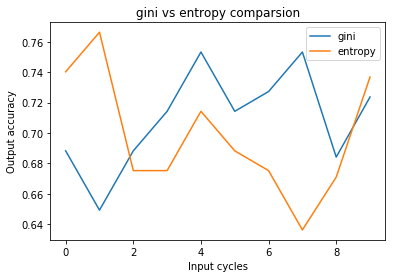

In [922]:
cycles = range(10)
plt.plot(cycles, accuracy_gini, label='gini')
# plot x vs yhat
plt.plot(cycles, accuracy_entropy, label='entropy')
plt.title('gini vs entropy comparsion')
plt.xlabel('Input cycles')
plt.ylabel('Output accuracy')
plt.legend()
plt.show()

## 2.d why standardizing helps in improving performance

*Standardizing a dataset in machine learning helps with making the data comparable across tasks and algorithms.There are many data preprocessing steps that could be applied to a dataset, such as data normalization, feature selection, data transformations, and so on. In the given dataset there were some zero values which are kind of outliers in data and hence removing zeros before applying DT algorithm definitely improved the performance. <br>Also when I tried to standardize the dataset using formula*
<br><center>__standardized_data__ $= \frac{data - \mu }{\sigma}$</center>
There was no change in the performance of the model. The reason for that is because the data is highly correlated and is standardized.

## Task 3[Classification parameters DT]

### Task 3.a min_samples_split effect on performance of algorithm

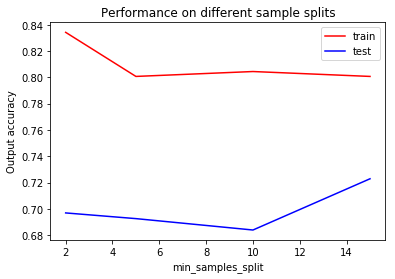

In [952]:
min_samples_split = [2, 5, 10, 15]
acc_comparsion_train = []
acc_comparsion_test = []
for sample in min_samples_split:
    acc_comparsion_train.append(compare_performance(min_samples_split = sample)[0])
    acc_comparsion_test.append(compare_performance(min_samples_split = sample)[1])
# plot x vs yhat
plt.plot(min_samples_split, acc_comparsion_train, label='train', color='r')
plt.plot(min_samples_split, acc_comparsion_test, label='test', color='b')
plt.title('Performance on different sample splits')
plt.xlabel('min_samples_split')
plt.ylabel('Output accuracy')
plt.legend()
plt.show()

### Task 3.b max_depth effect on performance of algorithm

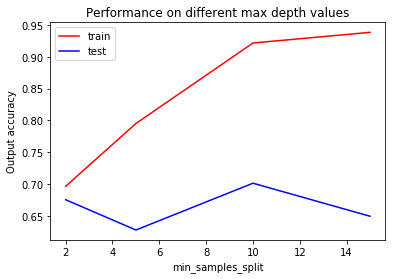

In [953]:
max_depth = [3, 4, 5, 6]
acc_comparsion_train = []
acc_comparsion_test = []
for sample in min_samples_split:
    acc_comparsion_train.append(compare_performance(max_depth = sample)[0])
    acc_comparsion_test.append(compare_performance(max_depth = sample)[1])
# plot x vs yhat
plt.plot(min_samples_split, acc_comparsion_train, label='train', color='r')
plt.plot(min_samples_split, acc_comparsion_test, label='test', color='b')
plt.title('Performance on different max depth values')
plt.xlabel('min_samples_split')
plt.ylabel('Output accuracy')
plt.legend()
plt.show()

## Task 4[Decision Tree Boundaries] - Implemented this part to understand decision tree better

DecisionTree Feature ranking:
_________________________________________________
1. feature plas (0.279590)
2. feature age (0.258963)
3. feature preg (0.173994)
4. feature pedi (0.077421)
5. feature mass (0.074268)
6. feature skin (0.056152)
7. feature pres (0.043162)
8. feature insu (0.036450)
_________________________________________________


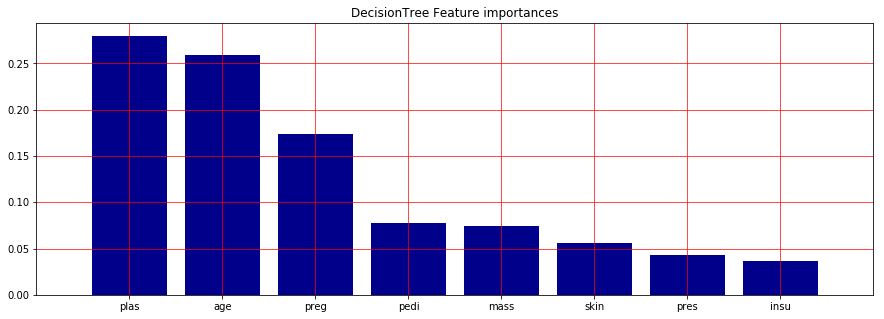

In [692]:
#Feature Importance DecisionTreeClassifier
importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]
feature = X_train
feat_names = sourcevars.columns
print("DecisionTree Feature ranking:")
print('_________________________________________________')
for f in range(feature.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))

print('_________________________________________________')
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(feature.shape[1]), importance[indices], color='#00008B', align="center")
plt.xticks(range(feature.shape[1]), list(feat_names[indices]))
plt.xlim([-1, feature.shape[1]])
plt.grid(True, linewidth=0.7, color='#ff0000', linestyle='-')
plt.show()


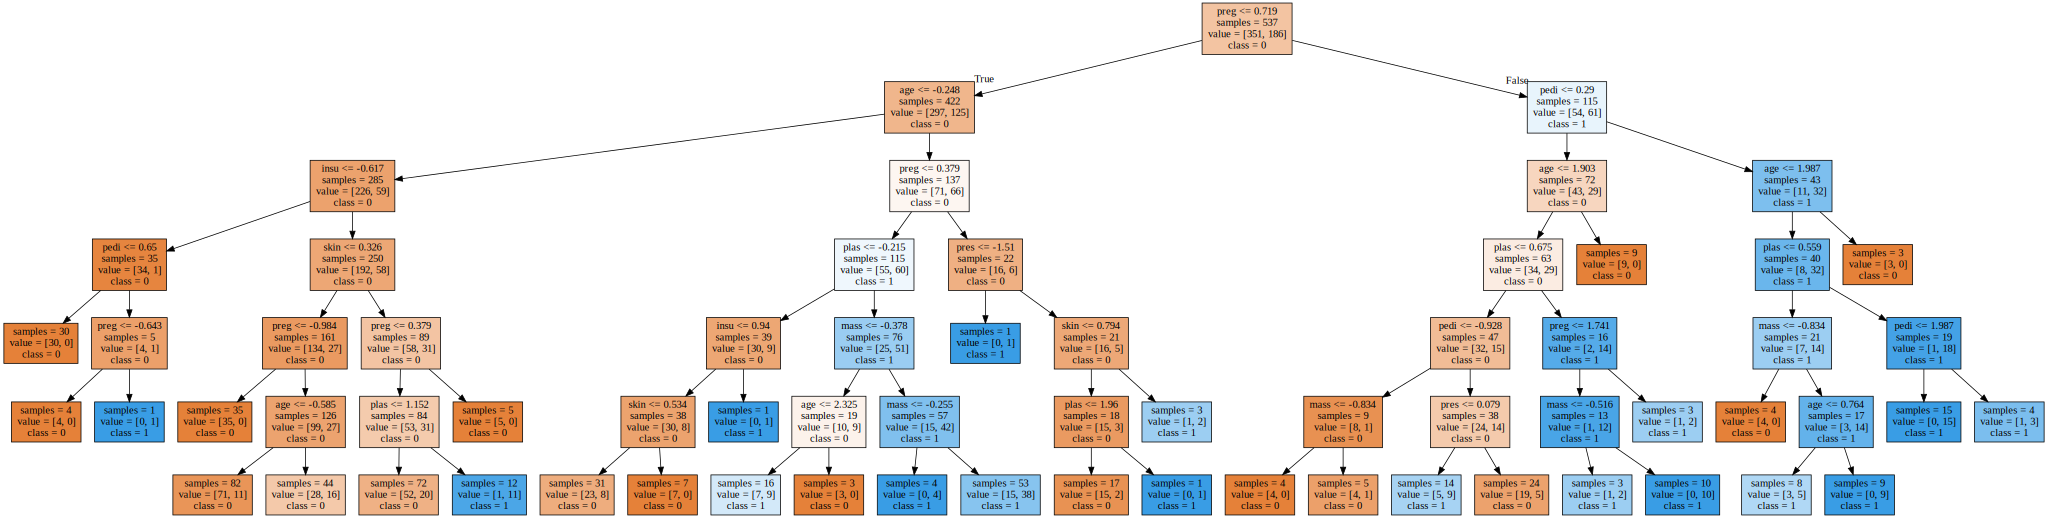

In [629]:
from sklearn.tree import export_graphviz
import graphviz

importance = tree.feature_importances_
indices = np.argsort(importance)[::-1]

export_graphviz(tree,out_file="diabetes_tree.dot",class_names=["0","1"],
feature_names=sourcevars.columns,impurity=False,filled=True)
with open("diabetes_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

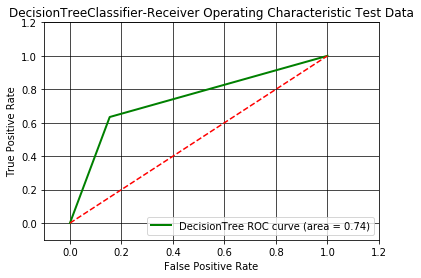

In [707]:
#Evaluation DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import random

fpr,tpr,thres = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.title('DecisionTreeClassifier-Receiver Operating Characteristic Test Data')
plt.plot(fpr, tpr, color='green', lw=2, label='DecisionTree ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.grid(True, linewidth=0.7, color='black', linestyle='-')
plt.show()